<a href="https://www.kaggle.com/code/rajatraj0502/stock-market-dataset?scriptVersionId=138261729" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-dataset/Book1.xlsx


In [2]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('/kaggle/input/stock-market-dataset/Book1.xlsx')

# Display the first few rows of the DataFrame
df.head()


,Date,Closing Volume,Volume,50-Day Moving Average,200-Day Moving Average
0,2020-01-01,59.746333,916154.106622,48.965459,52.232315
1,2020-01-02,14.017123,978116.660674,49.617604,52.190672
2,2020-01-03,12.302963,15696.133135,50.948596,52.389854
3,2020-01-04,11.573981,666210.118867,51.439419,52.656657
4,2020-01-05,90.893874,835636.264069,51.926821,53.069813


In [3]:
# Check the shape of the dataset
shape = df.shape

# Check for missing values
missing_values = df.isnull().sum()

shape, missing_values


((2500, 5),
 Date                      0
 Closing Volume            0
 Volume                    0
 50-Day Moving Average     0
 200-Day Moving Average    0
 dtype: int64)

In [4]:
# Summary statistics
summary_stats = df.describe()

summary_stats


,Closing Volume,Volume,50-Day Moving Average,200-Day Moving Average
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,50.578901,500098.652390,50.476556,50.387707
std,28.683850,290958.820250,4.286788,2.640274
min,0.021902,193.305764,17.993856,17.993856
25%,26.228148,252445.797853,47.618018,48.591755
50%,50.870300,486105.265525,50.496660,50.622677
75%,74.861114,754871.289065,53.286231,52.201444
max,99.996835,999860.234122,63.433106,56.600309


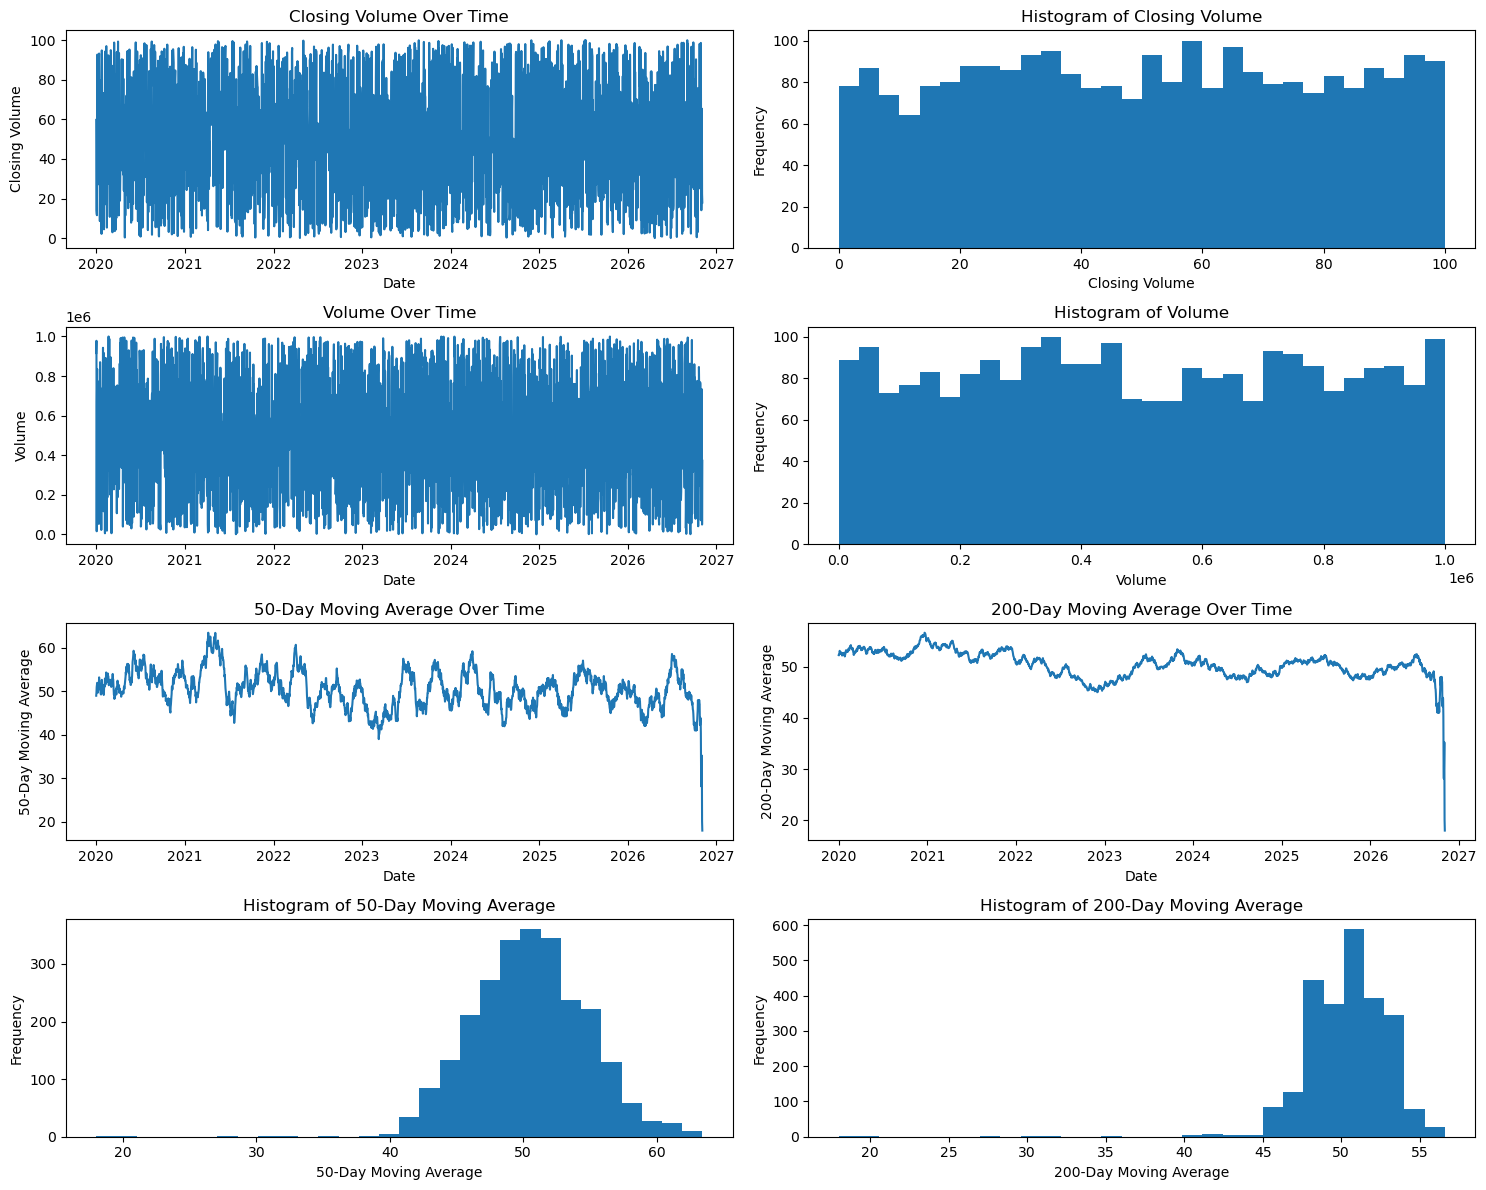

In [5]:
import matplotlib.pyplot as plt

# Define the figure size
plt.figure(figsize=(15, 12))

# Create a line plot of the closing volume over time
plt.subplot(4, 2, 1)
plt.plot(df['Date'], df['Closing Volume'])
plt.title('Closing Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Volume')

# Create a histogram of the closing volume
plt.subplot(4, 2, 2)
plt.hist(df['Closing Volume'], bins=30)
plt.title('Histogram of Closing Volume')
plt.xlabel('Closing Volume')
plt.ylabel('Frequency')

# Create a line plot of the volume over time
plt.subplot(4, 2, 3)
plt.plot(df['Date'], df['Volume'])
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Create a histogram of the volume
plt.subplot(4, 2, 4)
plt.hist(df['Volume'], bins=30)
plt.title('Histogram of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Create a line plot of the 50-day moving average over time
plt.subplot(4, 2, 5)
plt.plot(df['Date'], df['50-Day Moving Average'])
plt.title('50-Day Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('50-Day Moving Average')

# Create a line plot of the 200-day moving average over time
plt.subplot(4, 2, 6)
plt.plot(df['Date'], df['200-Day Moving Average'])
plt.title('200-Day Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('200-Day Moving Average')

# Create a histogram of the 50-day moving average
plt.subplot(4, 2, 7)
plt.hist(df['50-Day Moving Average'], bins=30)
plt.title('Histogram of 50-Day Moving Average')
plt.xlabel('50-Day Moving Average')
plt.ylabel('Frequency')

# Create a histogram of the 200-day moving average
plt.subplot(4, 2, 8)
plt.hist(df['200-Day Moving Average'], bins=30)
plt.title('Histogram of 200-Day Moving Average')
plt.xlabel('200-Day Moving Average')
plt.ylabel('Frequency')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df['Closing Volume'], order=(5,0,0))

# Fit the model
model_fit = model.fit()

# Summary of the model
model_fit.summary()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Closing Volume   No. Observations:                 2500
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -11930.680
Date:                Sat, 29 Jul 2023   AIC                          23875.359
Time:                        10:46:48   BIC                          23916.128
Sample:                             0   HQIC                         23890.160
                               - 2500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.5789      0.632     80.014      0.000      49.340      51.818
ar.L1         -0.0015      0.020     -0.072      0.942      -0.041       0.038
ar.L2         -0.0073      0.020     -0.366      0.714      -0.046       0.032
ar.L3          0.0395      0.020      1.966      0.049       0.000       0.079
ar.L4          0.0631      0.020      3.146      0.002       0.024       0.102
ar.L5          0.0017      0.020      0.087      0.930      -0.038       0.041
sigma2       817.0340     35.875     22.775      0.000     746.721     887.347
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               141.19
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.01
Prob(H) (two-sided):                  0.71   Kurtosis:                         1.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the Closing Volume series
result = adfuller(df['Closing Volume'])

# Print the results
{
    'ADF Statistic': result[0],
    'p-value': result[1],
    'Number of lags used': result[2],
    'Number of observations used': result[3],
    'Critical Values': result[4],
}


{'ADF Statistic': -22.863642375575697,
 'p-value': 0.0,
 'Number of lags used': 3,
 'Number of observations used': 2496,
 'Critical Values': {'1%': -3.432972611342269,
  '5%': -2.862698654944332,
  '10%': -2.567386797035513}}

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df['Closing Volume'], order=(5,0,0))

# Fit the model
model_fit = model.fit()

# Summary of the model
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Closing Volume   No. Observations:                 2500
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -11930.680
Date:                Sat, 29 Jul 2023   AIC                          23875.359
Time:                        10:46:50   BIC                          23916.128
Sample:                             0   HQIC                         23890.160
                               - 2500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.5789      0.632     80.014      0.000      49.340      51.818
ar.L1         -0.0015      0.020     -0.072      0.942      -0.041       0.038
ar.L2         -0.0073      0.020     -0.366      0.714      -0.046       0.032
ar.L3          0.0395      0.020      1.966      0.049       0.000       0.079
ar.L4          0.0631      0.020      3.146      0.002       0.024       0.102
ar.L5          0.0017      0.020      0.087      0.930      -0.038       0.041
sigma2       817.0340     35.875     22.775      0.000     746.721     887.347
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               141.19
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.01
Prob(H) (two-sided):                  0.71   Kurtosis:                         1.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# Define the number of steps ahead to forecast
n_steps = 30


In [10]:
# Generate the forecast
forecast = model_fit.forecast(steps=n_steps)

# Create a new DataFrame for the forecast data
df_forecast = pd.DataFrame({
    'Date': pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_steps, freq='D'),
    'Forecast': forecast,
})

df_forecast


,Date,Forecast
2500,2026-11-05,49.485874
2501,2026-11-06,50.584100
2502,2026-11-07,47.538316
2503,2026-11-08,48.434631
2504,2026-11-09,50.478500
2505,2026-11-10,50.473016
2506,2026-11-11,50.303224
2507,2026-11-12,50.435485
2508,2026-11-13,50.566842
2509,2026-11-14,50.562204


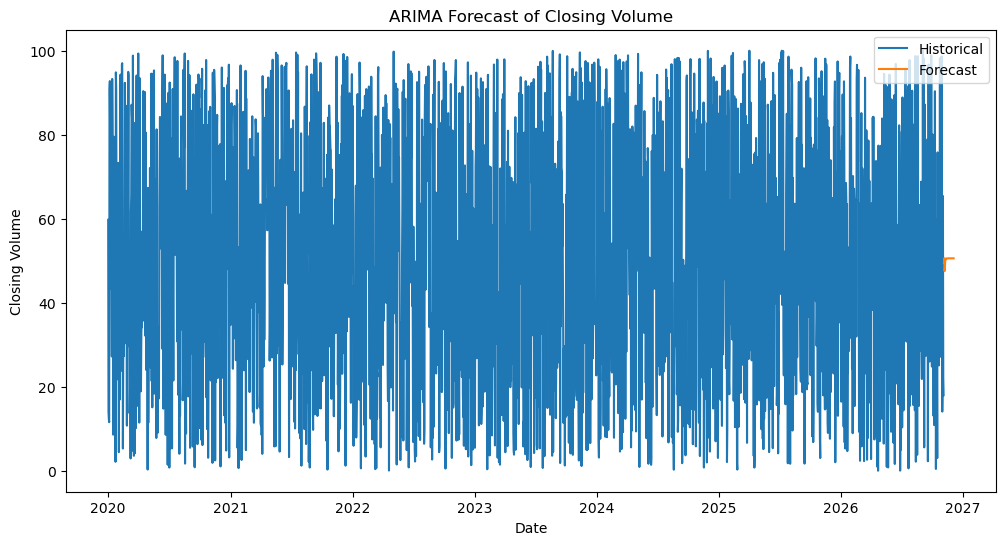

In [11]:
# Define the figure
plt.figure(figsize=(12, 6))

# Plot the historical data
plt.plot(df['Date'], df['Closing Volume'], label='Historical')

# Plot the forecast
plt.plot(df_forecast['Date'], df_forecast['Forecast'], label='Forecast')

# Define the labels and title
plt.xlabel('Date')
plt.ylabel('Closing Volume')
plt.title('ARIMA Forecast of Closing Volume')
plt.legend()

# Show the plot
plt.show()


In [12]:
import numpy as np
import itertools

# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Create an empty list to store the results
results = []

# Run a grid search over all possible combinations of p, d and q
for param in pdq:
    try:
        model = ARIMA(df['Closing Volume'], order=param)
        model_fit = model.fit()
        results.append((param, model_fit.aic))
    except:
        continue

# Find the parameters with minimal AIC value
best_params = min(results, key=lambda x: x[1])

best_params


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/sta

((0, 1, 1), 23876.72298256631)

In [13]:
# Define the ARIMA model with the optimized parameters
model_optimized = ARIMA(df['Closing Volume'], order=best_params[0])

# Fit the model
model_optimized_fit = model_optimized.fit()

# Generate the forecast
forecast_optimized = model_optimized_fit.forecast(steps=n_steps)

# Create a new DataFrame for the forecast data
df_forecast_optimized = pd.DataFrame({
    'Date': pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_steps, freq='D'),
    'Forecast': forecast_optimized,
})

df_forecast_optimized


,Date,Forecast
2500,2026-11-05,49.670036
2501,2026-11-06,49.670036
2502,2026-11-07,49.670036
2503,2026-11-08,49.670036
2504,2026-11-09,49.670036
2505,2026-11-10,49.670036
2506,2026-11-11,49.670036
2507,2026-11-12,49.670036
2508,2026-11-13,49.670036
2509,2026-11-14,49.670036


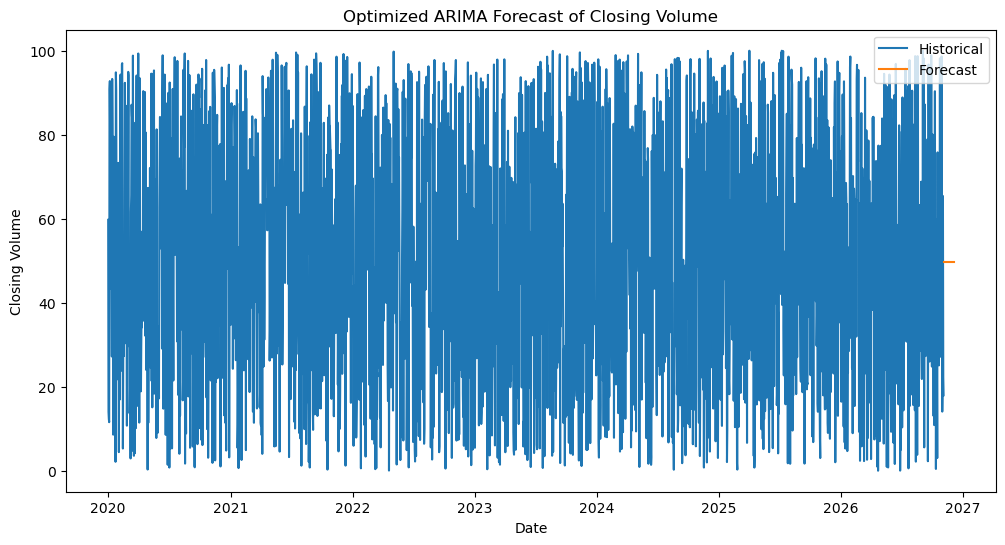

In [14]:
# Define the figure
plt.figure(figsize=(12, 6))

# Plot the historical data
plt.plot(df['Date'], df['Closing Volume'], label='Historical')

# Plot the forecast
plt.plot(df_forecast_optimized['Date'], df_forecast_optimized['Forecast'], label='Forecast')

# Define the labels and title
plt.xlabel('Date')
plt.ylabel('Closing Volume')
plt.title('Optimized ARIMA Forecast of Closing Volume')
plt.legend()

# Show the plot
plt.show()
